# Introduction to Feature Engineering

## Introduction

In the past lessons, we've seen how we can use pandas to select specific columns, and then feed them into a machine learning model.  As we know, we can only feed numerical data into a machine learning model.  

There are a lot of different tools and techniques for representing our data as numbers -- called feature engineering.  In this lesson, we'll get an introduction into data engineering by taking data that starts off as text, and using the `category` datatype in pandas to convert it into numbers.

### Exploring our data

In this lesson, let's stick with our imdb movies dataset.  

In [2]:
import pandas as pd
movies_df = pd.read_csv('https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/imdb_movies.csv')
movies_df[:5]

title      genre     budget  runtime  \
0                                    Avatar     Action  237000000    162.0   
1  Pirates of the Caribbean: At World's End  Adventure  300000000    169.0   
2                                   Spectre     Action  245000000    148.0   
3                     The Dark Knight Rises     Action  250000000    165.0   
4                               John Carter     Action  260000000    132.0   

   year  month     revenue  
0  2009     12  2787965087  
1  2007      5   961000000  
2  2015     10   880674609  
3  2012      7  1084939099  
4  2012      3   284139100

Now in the data above, we'll be using `genre`, `budget`, `runtime`, `year`, and `month` as our feature columns, and `revenue` as the target that we are trying to predict.  We won't use `title` at all in our model, but it's nice to have.

Let's select `genre`, `budget`, `runtime`, `year` and `month` and assign them to the variable `X`.

In [3]:
feature_columns = ['genre', 'budget', 'runtime', 'year', 'month']
X = movies_df[feature_columns]

And we'll select revenue and assign it to the variable `y`.

In [4]:
y = movies_df.revenue

Now let's check that our `X` and `y` variables look good.

In [5]:
y[:2]

0    2787965087
1     961000000
Name: revenue, dtype: int64

In [6]:
X[:2]

genre     budget  runtime  year  month
0     Action  237000000    162.0  2009     12
1  Adventure  300000000    169.0  2007      5

### Exploring Data

Now looking at our features in `X` above, it looks like all of the columns are of a type number except for `genre`.  We can confirm this by using the `dtypes` method on our `X` dataframe.

In [7]:
X.dtypes

genre       object
budget       int64
runtime    float64
year         int64
month        int64
dtype: object

So using `dtypes` we indeed see that all but one of the columns are numerical

> The `float64` means that there are numbers with decimal points, and the `int64` means all are numbers are without decimals (that is, they are integers).

Now remember that our goal is to assign each value in the genre column to it's own number.  Before changing the data, a nice thing to do is to get a summary of the information in the column.

One good method for this is the `value_counts` method.  Let's give it a shot.

In [12]:
X['genre'].value_counts()

Action             483
Drama              365
Comedy             359
Adventure          236
Animation           93
Fantasy             80
Crime               76
Thriller            73
Horror              59
Science Fiction     52
Romance             40
Name: genre, dtype: int64

So we can see that there about a dozen different categories and that action is the most popular.  

### Changing the data

Now that we have used the `dtypes` method to identify the non-numerical column, and the `value_counts` method to see that our genres were labeled as 12 different categories, it's time to begin assigning each of these categories to a unique number.

Now currently the `genre` column is of type `object`.  Object is the pandas equivalent for textual data.  

In [13]:
X.dtypes

genre       object
budget       int64
runtime    float64
year         int64
month        int64
dtype: object

We can do more with our column if we change it to type text.  So we first select the column and then change the datatype.

In [14]:
genre = X['genre'].astype('category')

In [15]:
genre.dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Drama', 'Fantasy', 'Horror', 'Romance', 'Science Fiction',
                  'Thriller'],
                 ordered=False)

So now our the column assigned to `genre` is of type category.  If we look at the values in this column it looks the same.

In [16]:
genre[:3]

0       Action
1    Adventure
2       Action
Name: genre, dtype: category
Categories (11, object): [Action, Adventure, Animation, Comedy, ..., Horror, Romance, Science Fiction, Thriller]

But pandas has properly stored translated each value to a corresponding number.  We just have to do a little work to get those numbers.  We can access those numbers by calling `genre.cat.codes`.  Let's do it.

In [17]:
genre_codes = genre.cat.codes
genre_codes[:4]

0    0
1    1
2    0
3    0
dtype: int8

Ok great now we have a list of numbers that corresponds to each category.

In [18]:
genre[:4]

0       Action
1    Adventure
2       Action
3       Action
Name: genre, dtype: category
Categories (11, object): [Action, Adventure, Animation, Comedy, ..., Horror, Romance, Science Fiction, Thriller]

Our final step is to take the data in our dataframe.

In [19]:
X[:2]

genre     budget  runtime  year  month
0     Action  237000000    162.0  2009     12
1  Adventure  300000000    169.0  2007      5

And replace the `genre` column with our `genre_codes` series.

In [20]:
X.assign(genre=genre_codes)

genre     budget  runtime  year  month
0         0  237000000    162.0  2009     12
1         1  300000000    169.0  2007      5
2         0  245000000    148.0  2015     10
3         0  250000000    165.0  2012      7
4         0  260000000    132.0  2012      3
...     ...        ...      ...   ...    ...
1995     10   23000000    108.0  2000      2
1996      3   23000000     97.0  2001      3
1997      8   23000000    126.0  2013     12
1998     -1   23000000     97.0  2001     10
1999      6   25000000     99.0  2013     12

[2000 rows x 5 columns]

> So above, we used like `X.assign(genre=genre_codes)` to replace the genre column with the `genre_codes` series.  

But this returns a new dataframe, it does not update our old dataframe.  Notice that `X` is unchanged.

In [21]:
X[:1]

genre     budget  runtime  year  month
0  Action  237000000    162.0  2009     12

But we can reassign X with the following line of code.

In [22]:
X = X.assign(genre=genre_codes)

And now all of our data is numerical.

In [23]:
X.dtypes

genre         int8
budget       int64
runtime    float64
year         int64
month        int64
dtype: object

Finally, if we want to see the what each number represents we can get this from pandas.

In [24]:
dict(enumerate(genre.cat.categories))

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Comedy',
 4: 'Crime',
 5: 'Drama',
 6: 'Fantasy',
 7: 'Horror',
 8: 'Romance',
 9: 'Science Fiction',
 10: 'Thriller'}

### Training the Model

Ok, now that all of our features are numeric, we can train the model.

In [94]:
X.dtypes

genre         int8
budget       int64
runtime    float64
year         int64
month        int64
dtype: object

In [95]:
y[:2]

0    2787965087
1     961000000
Name: revenue, dtype: int64

In [96]:
from sklearn.tree import DecisionTreeRegressor

> Ok, now we use a `DecisionTreeRegressor` (as opposed to a DecisionTreeClassifier) because the revenue data is not just a $1$ or $0$, but potentially any value greater than 0.  When our data can be any value in a specified range, it's called continuous - and with continuous data we use the regressor.

Now follow the steps training a model.  First initialize our `DecisionTreeRegressor` and assign it to model.

In [97]:
model = DecisionTreeRegressor()

Then train the model, with the `fit` method.

In [98]:
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

And finally, we can make a prediction, by passing through the features of an observation.

In [99]:
observation = X[:1]

model.predict(observation)

array([2.78796509e+09])

We can also see the hypothesis function for our model.

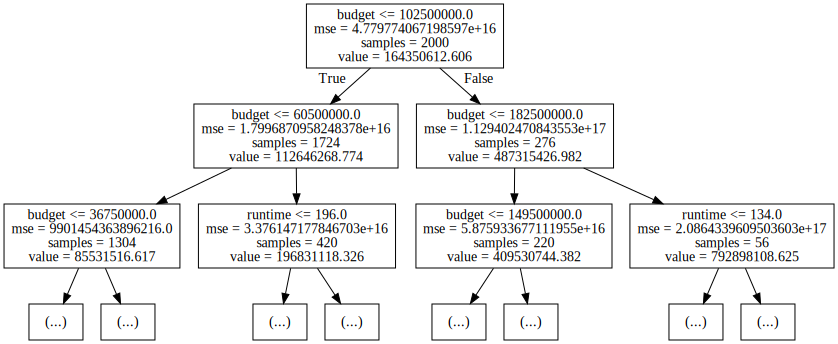

In [100]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 

Source(tree.export_graphviz(model, out_file = None, feature_names=X.columns, max_depth = 2))

Let's interpret diagram above.  The `value` on the first node at the top, is the average revenue for all movies - `164350612`.  The best split point for all of the data is whether the movie is less than or greater that 140 minutes.  Splitting the data there provides a the less than 140 minutes group having an average revenue of `145596396`, and over 140 minutes having an average of `357508445`.

Then the data is split based on whether the genre value is less than 2 or less than 2.5 -- the mapping below shows the split asks if the genre is Action, Adventure or Animation.  

The decision tree continues beyond the image, but we only printed out three levels.  A complete mapping of the numbers to genres is provided below.  

### Summary

In this lesson, we had some practice changing some of our text data into numbers.  We did by first exploring our data, and then changing our data.  We explored our data with the following:

In [26]:
movies_df.dtypes

title       object
genre       object
budget       int64
runtime    float64
year         int64
month        int64
revenue      int64
dtype: object

We identified the `genre` column as a series that we potentially wanted to use in our model.  We explored it more with the `value_counts` method. 

In [33]:
movies_df.genre.value_counts()[:3]

Action    483
Drama     365
Comedy    359
Name: genre, dtype: int64

It looks like the categorical, so we changed it as such.

First, we changed the datatype of the column.

In [28]:
genre = movies_df['genre'].astype('category')

Now that it's a category, every unique value was assigned a different number.

In [34]:
genre_nums = genre.cat.codes
genre_nums[:3]

0    0
1    1
2    0
dtype: int8

So we can replace the column with the data.

In [37]:
updated_df = movies_df.assign(genre = genre_nums)

And now see that genre is of type integer.

In [38]:
updated_df.dtypes

title       object
genre         int8
budget       int64
runtime    float64
year         int64
month        int64
revenue      int64
dtype: object

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="jigsaw-main.png" width="15%" style="text-align: center"></a>
</center>